# Digital Marketing Analysis 

## Introduction


Problem Statement:

An e-commerce company is looking to enhance the effectiveness of its digital marketing campaigns. Despite having a significant reach and engagement, the company is not achieving its desired conversion rates, which impacts overall sales and revenue. The company wants to understand the factors that influence customer conversions, such as demographics, customer engagement with marketing materials, and historical purchasing behavior.

Objective:

Develop a predictive model using the dataset to identify which customers are most likely to convert (make a purchase) after interacting with digital marketing campaigns. By understanding the key drivers of conversion, the company aims to:

Optimize Marketing Spend: Allocate budget more effectively by targeting customers who are more likely to convert, thus reducing cost per acquisition.
Personalize Marketing Strategies: Tailor marketing messages and offers to different customer segments based on their likelihood to convert.
Improve Customer Retention: Identify at-risk customers who are less likely to convert and develop strategies to re-engage them.

In [89]:
# import necessary libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# read csv
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
df.shape

(8000, 20)

In [5]:
df.info()

# no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

### Age

c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


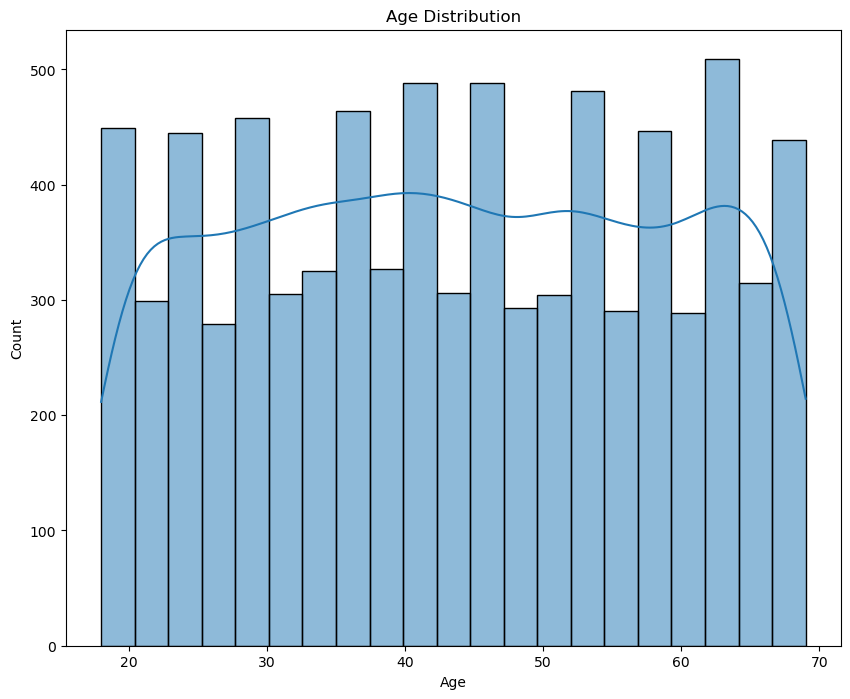

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show();

### Gender

In [24]:
df['Gender'].value_counts()


Gender
Female    4839
Male      3161
Name: count, dtype: int64

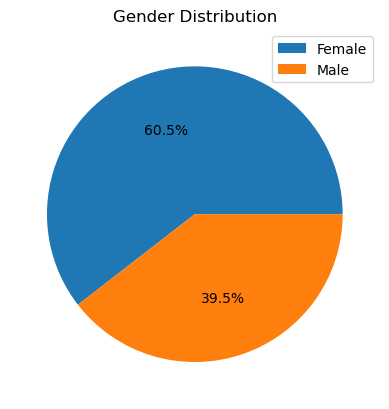

In [27]:
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Gender Distribution');
plt.legend(labels=df['Gender'].value_counts().index)

### Campaign Channel

In [48]:
df['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

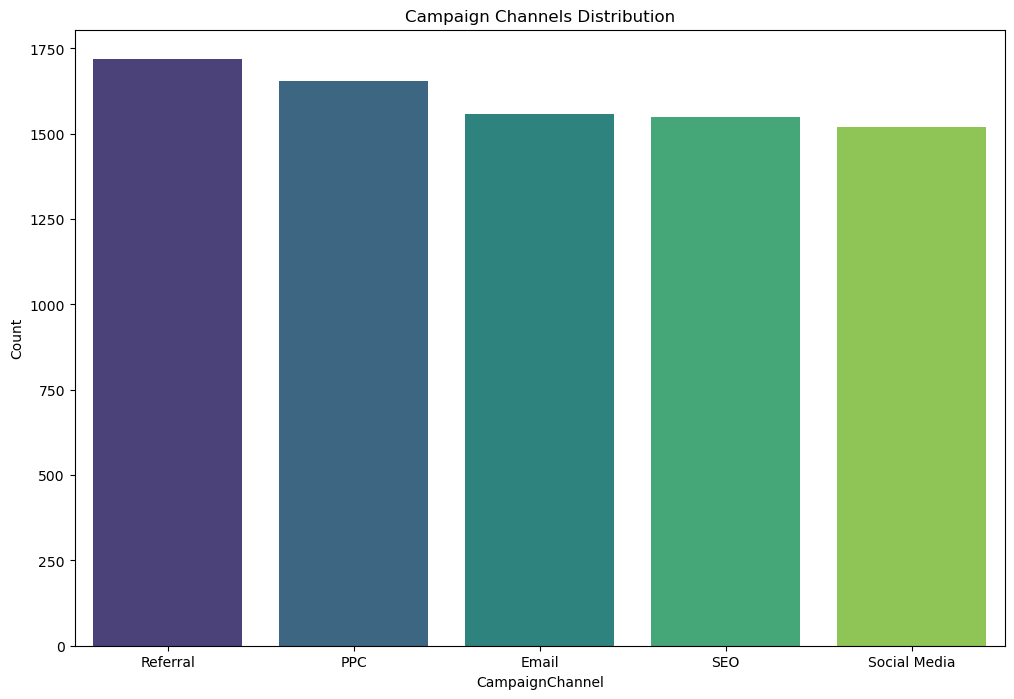

In [41]:
#plot bar plot for campaign channels
plt.figure(figsize=(12,8))

x = df['CampaignChannel'].value_counts().index
y = df['CampaignChannel'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Channels Distribution')
plt.ylabel('Count');


The most used campaign channel is **Referrals** with 1719

### Campaign type

In [50]:
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

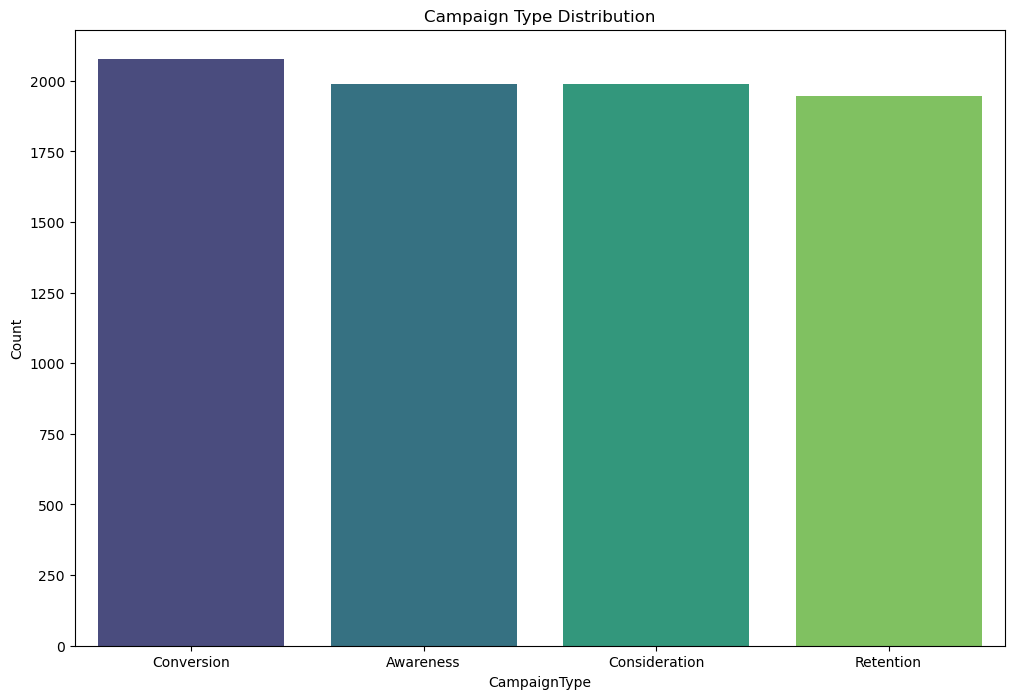

In [51]:
#plot bar plot for campaign type
plt.figure(figsize=(12,8))

x = df['CampaignType'].value_counts().index
y = df['CampaignType'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Type Distribution')
plt.ylabel('Count');

The most used campaign type is **Conversion** with 2077.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
# Drop AdvertisingPlatform , AdvertisingTool
df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'], inplace=True)

### Split data

In [87]:
y = df['Conversion']
X = df.drop(columns='Conversion', axis=1)

X

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709


In [90]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# create dummy variably for categorical variables

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
1467,9467,61,Male,93885,Social Media,Conversion,5689.175098,0.279867,0.159560,12,5.928037,0.649357,43,10,8,0,3990
5768,13768,36,Male,132985,PPC,Conversion,5424.122607,0.208562,0.101926,36,8.176488,14.470432,89,4,4,5,3761
5714,13714,19,Female,108713,SEO,Conversion,3927.956305,0.171735,0.085737,0,4.482721,11.193668,80,16,5,9,3612
1578,9578,56,Male,58596,Social Media,Retention,4292.600884,0.120824,0.061660,16,9.437501,7.128225,27,3,1,8,336
6958,14958,54,Female,58585,PPC,Conversion,1103.799992,0.116697,0.038537,31,3.663657,0.631376,99,7,5,7,2514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,13226,56,Female,78642,PPC,Conversion,2940.130788,0.035823,0.169867,25,1.464216,12.634534,21,1,3,8,3044
5390,13390,39,Female,127845,Email,Awareness,6679.943050,0.152653,0.197298,30,4.940007,13.160262,7,6,7,6,4010
860,8860,51,Male,111150,PPC,Consideration,4355.586567,0.184523,0.034020,15,2.937878,8.336308,44,10,6,5,398
7603,15603,57,Male,55402,Referral,Awareness,6740.116155,0.256332,0.133939,10,8.001640,10.509658,71,7,3,8,3375


In [79]:
\\d\f2 = pd.get_dummies(data=df, columns=['Gender', 'CampaignChannel', 'CampaignType'], drop_first=True, dtype=int)
df2

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,688,1,0,0,0,0,1,0,0,0
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,3459,1,1,0,0,0,0,0,0,1
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,2337,1,0,1,0,0,0,0,0,0
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,2463,1,0,1,0,0,0,0,1,0
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,4345,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,...,286,0,1,0,0,0,0,0,0,0
7996,15996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,...,1502,0,0,0,0,1,0,0,0,1
7997,15997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,...,738,1,0,0,1,0,0,1,0,0
7998,15998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,...,2709,1,0,1,0,0,0,1,0,0


In [82]:
df2.corr()['Conversion']

CustomerID                     -0.180742
Age                             0.001606
Income                          0.013974
AdSpend                         0.124672
ClickThroughRate                0.120012
ConversionRate                  0.093185
WebsiteVisits                   0.079339
PagesPerVisit                   0.102840
TimeOnSite                      0.129609
SocialShares                   -0.011449
EmailOpens                      0.124884
EmailClicks                     0.129521
PreviousPurchases               0.111781
LoyaltyPoints                   0.095004
Conversion                      1.000000
Gender_Male                     0.001075
CampaignChannel_PPC             0.009748
CampaignChannel_Referral        0.010449
CampaignChannel_SEO             0.000409
CampaignChannel_Social Media   -0.012015
CampaignType_Consideration     -0.036470
CampaignType_Conversion         0.102696
CampaignType_Retention         -0.031471
Name: Conversion, dtype: float64